# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ratings_Electronics (1).csv')
df.head()


,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [3]:
df.rename(columns={'AKM1MP6P0OYPR':'User ID','0132793040':'Product ID','5.0':'Ratings','1365811200':'Time Stamp'},inplace= True)
df.head()

,User ID,Product ID,Ratings,Time Stamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


# Analysis

In [4]:
df.shape

(7824481, 4)

In [5]:
rows, columns = df.shape[0], df.shape[1]
print("No of rows: ", rows) 
print("No of columns: ", columns) 

No of rows:  7824481
No of columns:  4


In [6]:
df.isnull().sum()

User ID       0
Product ID    0
Ratings       0
Time Stamp    0
dtype: int64

In [7]:
df.describe(include="all")

,User ID,Product ID,Ratings,Time Stamp
count,7824481,7824481,7.824481e+06,7.824481e+06
unique,4201696,476001,NaN,NaN
top,A5JLAU2ARJ0BO,B0074BW614,NaN,NaN
freq,520,18244,NaN,NaN
mean,NaN,NaN,4.012337e+00,1.338178e+09
std,NaN,NaN,1.380910e+00,6.900426e+07
min,NaN,NaN,1.000000e+00,9.127296e+08
25%,NaN,NaN,3.000000e+00,1.315354e+09
50%,NaN,NaN,5.000000e+00,1.361059e+09
75%,NaN,NaN,5.000000e+00,1.386115e+09


In [8]:
df.dtypes

User ID        object
Product ID     object
Ratings       float64
Time Stamp      int64
dtype: object

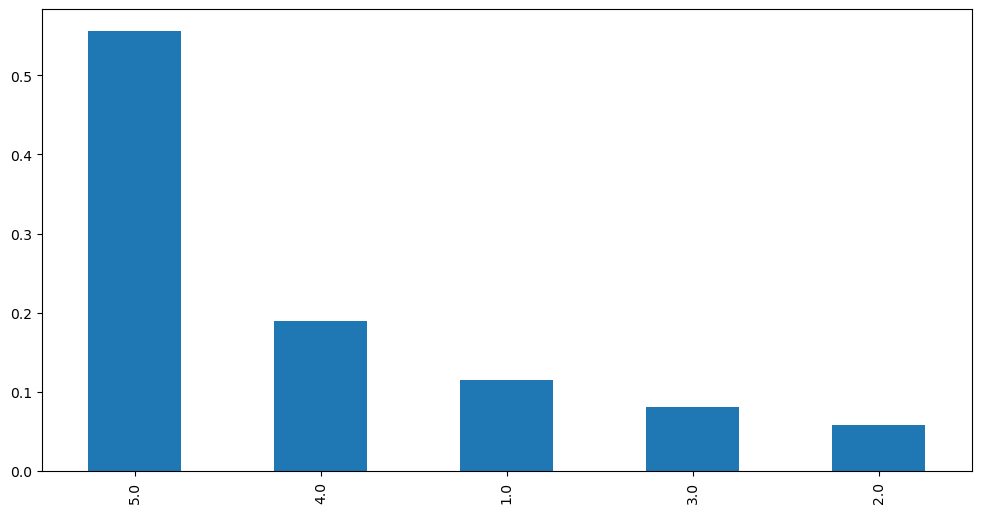

In [9]:
plt.figure(figsize = (12,6))
df['Ratings'].value_counts(1).plot(kind='bar')
plt.show()

**observation:-**
Max of the ratings are positive (Approx. 55% is 5.0, and Approx 19% is 4.0). This shows that most users were happy with the products they rated.
~12% of the ratings is 1.0 and only ~5% is 2.0. It also gives positive idea about the products.

In [10]:
print('Number of unique USERS in Raw data = ', df['User ID'].nunique())
print('Number of unique ITEMS in Raw data = ', df['Product ID'].nunique())

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476001


There are 42,01,696 users and 4,76,002 products in the dataset.

In [11]:
most_rated = df.groupby('User ID').size().sort_values(ascending=False)[:10]
most_rated

User ID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
dtype: int64

The highest number of ratings by a user is 520 which is far from the actual number of products present in the data. 

In [12]:
num_rating_df=df.groupby('Product ID')['Ratings'].count().sort_values(ascending=False).reset_index()
num_rating_df.rename(columns={'Ratings':'num_ratings'},inplace=True)
num_rating_df

,Product ID,num_ratings
0,B0074BW614,18244
1,B00DR0PDNE,16454
2,B007WTAJTO,14172
3,B0019EHU8G,12285
4,B006GWO5WK,12226
...,...,...
475996,B004WL91KI,1
475997,B004WL9FK4,1
475998,B004WL9Q2Q,1
475999,B004WL9R8O,1


# Preparation of Data

In [13]:
avg_rating_df=df.groupby('Product ID')['Ratings'].mean().sort_values(ascending=False).reset_index()
avg_rating_df.rename(columns={'Ratings':'avg_ratings'},inplace=True)
avg_rating_df

,Product ID,avg_ratings
0,0321732944,5.0
1,B004SGJ030,5.0
2,B004SQC6O0,5.0
3,B004SQE6YI,5.0
4,B004SQFFCK,5.0
...,...,...
475996,B00EZ2JEIS,1.0
475997,B004RJ974A,1.0
475998,B00EZ3SKUA,1.0
475999,B0047E3570,1.0


In [14]:
popular_df=num_rating_df.merge(avg_rating_df,on='Product ID')
popular_df

,Product ID,num_ratings,avg_ratings
0,B0074BW614,18244,4.491504
1,B00DR0PDNE,16454,3.931020
2,B007WTAJTO,14172,4.424005
3,B0019EHU8G,12285,4.754497
4,B006GWO5WK,12226,4.314657
...,...,...,...
475996,B004WL91KI,1,4.000000
475997,B004WL9FK4,1,1.000000
475998,B004WL9Q2Q,1,4.000000
475999,B004WL9R8O,1,5.000000


In [15]:
popular_df=popular_df[popular_df["num_ratings"]>=2000]
popular_df.shape

(186, 3)

In [16]:
popular_df.merge(df,on='Product ID').drop_duplicates('Product ID')[['User ID','Product ID','num_ratings','avg_ratings','Ratings']]

,User ID,Product ID,num_ratings,avg_ratings,Ratings
0,A3501BQE45OX22,B0074BW614,18244,4.491504,4.0
18244,A2OW7IC5Z1CAZM,B00DR0PDNE,16454,3.931020,5.0
34698,A3ITORNXVBK05M,B007WTAJTO,14172,4.424005,5.0
48870,A1FWX9ALQA1IK4,B0019EHU8G,12285,4.754497,3.0
61155,A4GHPW9AAH1NY,B006GWO5WK,12226,4.314657,5.0
...,...,...,...,...,...
704849,A31QIKZV0CGSI9,B008CS5QTW,2029,3.894529,5.0
706878,A2X3PC4X3DP38M,B007XOQ3BQ,2020,4.062871,5.0
708898,A3F4FBZUWQTUSN,B005KOZNBW,2015,3.679901,5.0
710913,A1G25CG7UWQ3XO,B00093IIRA,2014,3.994042,5.0


## collaborative Filtering on Rank based

In [17]:
x=df.groupby('User ID').count()['Ratings']>80
y=x[x].index
y

Index(['A100UD67AHFODS', 'A100WO06OQR8BQ', 'A10NMELR4KX0J6', 'A10PEXB6XAQ5XF',
       'A10Y058K7B96C6', 'A10ZFE6YE0UHW8', 'A1143YEAZYMYHJ', 'A11D1KHM7DVOQK',
       'A11EXFO14WEJM1', 'A11I1I9QLMAM1A',
       ...
       'AXYM52DNK6NDF', 'AY6A8KPYCE6B0', 'AYB4ELCS5AM8P', 'AYLLSFYS3UP1H',
       'AYMD77ITD15PT', 'AYNAH993VDECT', 'AYOTEJ617O60K', 'AZ515FFZ7I2P7',
       'AZAC8O310IK4E', 'AZMY6E8B52L2T'],
      dtype='object', name='User ID', length=479)

In [18]:
new=df[df['User ID'].isin(y)]

In [19]:
z=new.groupby('Product ID').count()["Ratings"]>=20
famous_prod=z[z].index
famous_prod.shape

(157,)

In [20]:
final=df[df['Product ID'].isin(famous_prod)]


In [21]:
final.drop_duplicates()

,User ID,Product ID,Ratings,Time Stamp
72027,AWVP6AL03FVYW,B00004ZCJE,2.0,1231718400
72028,A2Y73AS8Q8B4ZD,B00004ZCJE,4.0,1366761600
72029,A1Q1AB29V0T465,B00004ZCJE,3.0,1375056000
72030,A1OQLDUUVNPKGY,B00004ZCJE,1.0,1394064000
72031,A1K3TTFMIDN3JZ,B00004ZCJE,1.0,1223510400
...,...,...,...,...
7814829,A2GHU8I0P3HFRW,B00JP12170,5.0,1403568000
7814830,A1VKAY0XWLA2CY,B00JP12170,5.0,1403654400
7814831,A1OG0EI2IVN0CU,B00JP12170,1.0,1400716800
7814832,A3HUUBMKZ6A1L5,B00JP12170,4.0,1403136000


In [22]:
pt=final.pivot_table(index='Product ID',columns='User ID', values='Ratings')
pt

User ID,A000715434M800HLCENK9,A00090962SSLQRASQFP1O,A00166281YWM98A3SVD55,A002439424KGHR3LZ1OMZ,A00312984BSPFBE0FO1V,A0032930F4AY7IYCGK8C,A00404261ZP4CYUR980GA,A004176027NXFTHNBG3MW,A00471141BTTZQV3RS9VV,A0047322388NOTO4N8SKD,...,AZZTOUKVTUMVM,AZZUCZGO7P9HH,AZZUDVKC0E2XU,AZZV9PDNMCOZW,AZZX23UGJGKTT,AZZXC3Z8FMMPM,AZZXMJB7Z92SD,AZZY4W8E5AX2K,AZZYW4YOE1B6E,AZZZRS1YZ8HVP
Product ID,,,,,,,,,,,,,,,,,,,,,
B00004ZCJE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00005LEN4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00007E7JU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00007KDVI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0000BZL1P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00HFRWWAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00HSQAIQU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00IL7B2YM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pt.fillna(0,inplace=True)
pt

User ID,A000715434M800HLCENK9,A00090962SSLQRASQFP1O,A00166281YWM98A3SVD55,A002439424KGHR3LZ1OMZ,A00312984BSPFBE0FO1V,A0032930F4AY7IYCGK8C,A00404261ZP4CYUR980GA,A004176027NXFTHNBG3MW,A00471141BTTZQV3RS9VV,A0047322388NOTO4N8SKD,...,AZZTOUKVTUMVM,AZZUCZGO7P9HH,AZZUDVKC0E2XU,AZZV9PDNMCOZW,AZZX23UGJGKTT,AZZXC3Z8FMMPM,AZZXMJB7Z92SD,AZZY4W8E5AX2K,AZZYW4YOE1B6E,AZZZRS1YZ8HVP
Product ID,,,,,,,,,,,,,,,,,,,,,
B00004ZCJE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005LEN4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00007E7JU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00007KDVI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0000BZL1P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00HFRWWAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00HSQAIQU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00IL7B2YM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
 from sklearn.metrics.pairwise import cosine_similarity

In [25]:
similarity=cosine_similarity(pt)
similarity

array([[1.        , 0.03288131, 0.04330102, ..., 0.00966199, 0.00530539,
        0.0052911 ],
       [0.03288131, 1.        , 0.00369657, ..., 0.        , 0.        ,
        0.00267322],
       [0.04330102, 0.00369657, 1.        , ..., 0.00277457, 0.        ,
        0.00533728],
       ...,
       [0.00966199, 0.        , 0.00277457, ..., 1.        , 0.08809124,
        0.02889315],
       [0.00530539, 0.        , 0.        , ..., 0.08809124, 1.        ,
        0.01661333],
       [0.0052911 , 0.00267322, 0.00533728, ..., 0.02889315, 0.01661333,
        1.        ]])

In [26]:
similarity.shape

(157, 157)

In [27]:
np.where(pt.index=='B00004ZCJE')

(array([0], dtype=int64),)

In [28]:
def recommend(Product_ID):
    index=np.where(pt.index=='B00004ZCJE')[0][0]
    similar_prod=sorted(list(enumerate(similarity[0])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_prod:
        print(pt.index[i[0]])


In [29]:
recommend('B00004ZCJE')

B00007E7JU
B00005LEN4
B000QUUFRW
B002WE6D44
B0000BZL1P
